## Codigo para la transferencia de calor en una dimencion 

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def conduccion_1d(k,S,L,TA,TB,N):#creamos una funcion 
    """
    Parameters
    ----------
    L:float
    L es la longitud del dominio
    
    k:float
    es la cconductividad
    
    S=float
    es lafuente
    
    TA=float
    Es la condicion de frontera a la izquierda
    
    TB: float
    Es la condicion de la frontera a la derecha


    N: int
    Es el numero de nodos internos  (grados de libertad).
    
    Rturn
    ----------
    al final la funcion dibuja la solucion 
    """
    h=L/(N+1)


    T=np.zeros(N+2)
    b=np.zeros(N)
    A=np.zeros((N,N))


    r=k/h**2
    b[:]=S/r
    T[0]=TA
    T[-1]=TB
    #con "+=" se le puede agregar mas terminos y/o sumar
    b[0]+=TA 
    b[-1]+=TB

    for i in range(1,N-1):
        A[i,i]=2
        A[i,i+1]=-1
        A[i,i-1]=-1
        A[0,0]=2 ##para el primer renglon
        A[0,1]=-1
        A[-1,-2]=-1 #para el ultimo renglon
        A[-1,-1]=2

#para resolver el sistema lineal
    T[1:N+1]=np.linalg.solve(A,b) #resuelve el sistema y regresa un vector de tamaño 4
    #y mete los resultados dentro del vector T

    plt.plot(T, 'o-') 
    plt.show()

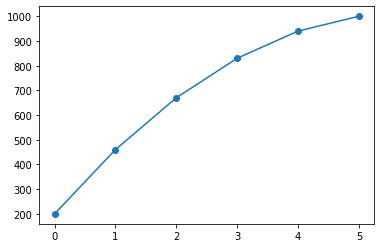

In [11]:
(conduccion_1d(0.02,1.0,5.0,200,1000,4)) #aqui le damos los valores de cada variable para que salga la funcion
#con "shif"+"tab" sobre "conduccion" nos dice que parametros que parametros

### Cuaderno interactivo

In [12]:
import ipywidgets as widgets

In [13]:
w = widgets.interactive(conduccion_1d,
                       k = widgets.fixed(0.02),
                       S = widgets.FloatSlider(max=1.0, min=0.0, value=0,step=0.2),
                       L = widgets.fixed(5.0),
                       TA = widgets.fixed(200),
                       TB = widgets.fixed(1000),
                       N = widgets.IntSlider(max=10, min=4, value=4))

In [14]:
display(w)

interactive(children=(FloatSlider(value=0.0, description='S', max=1.0, step=0.2), IntSlider(value=4, descripti…